In [1]:
import numpy as np
import numpy.random as r
import matplotlib.pyplot as plt
import scipy.special as sp
from scipy.special import gamma
np.random.seed(42)

In [2]:
def adfibo(alpha, n, x):
    s = 0*x
    for i in range(int(np.ceil(alpha)),n+1):
        if (i+n)%2==0:
            s=s+0
        else:
            s=s+(sp.gamma((n+i+1)/2))/(sp.gamma(i-alpha+1)*sp.gamma((n-i+1)/2))*x**(i-alpha)
    return s

def Input(x,degree,alpha):
    inp_x = []
    for i in range(1,degree+1):
        inp_x.append(adfibo(alpha,i,x))
    return np.array([inp_x])

def Neural_Network(input,degree,alpha,weights):
    z=[]
    z.append(Input(input, degree, alpha))
    z.append(np.dot(z[0],weights.T))
    return z[1], z[0]

In [3]:
def prob(input, alpha,degree,weights):
    tri_w = np.zeros_like(weights)
    h = np.zeros((len(weights[0]),len(weights[0])))
    error1  = 0
    error2  = 0
    z_int, dw_int = Neural_Network(0,degree,0,weights)
    z_int2, dw_int2 = Neural_Network(0,degree,1,weights)
    for l in input:
        z, dw = Neural_Network(l,degree,0,weights)
        z_alp, dw_alp = Neural_Network(l,degree,alpha,weights)
        z_1, dw_1 = Neural_Network(l, degree, 1, weights)
        
        tri_w =tri_w +2*(l*z_alp+ 2*z_1 +l* z**3-l*(6+l**6))*(l*dw_alp+2*dw_1 +l* 3*z**2*dw)
        
        for i in range(len(weights[0])):
                 for j in range(len(weights[0])):
                     h[i,j]=h[i,j]+2*(l*dw_alp[0,i]+2*dw_1[0,i] +l* 3*z**2*dw[0,i])*(l*dw_alp[0,j]+2*dw_1[0,j] +l* 3*z**2*dw[0,j])\
                            +2*(l*z_alp+ 2*z_1 +l* z**3-l*(6+l**6))*(l*6*z*dw[0,j]*dw[0,i])
    
        error1=error1+(l*z_alp+ 2*z_1 +l* z**3-l*(6+l**6))**2
        error2=error2+(l*z_alp+ 2*z_1 +l* z**3-l*(6+l**6))**2
        
    tri_w = tri_w/(2*len(input)) + (z_int)*dw_int + (z_int2)*dw_int2
    for i in range(len(weights[0])):
                 for j in range(len(weights[0])):
                      h[i,j]=h[i,j]/(2*len(input))+ dw_int[0,i]*dw_int[0,j] + dw_int2[0,i]*dw_int2[0,j]
                     
    error1=error1/(2*len(input)) + 1/2*(z_int)**2+1/2*(z_int2)**2
        
    return error1, error2/(2*len(input)),tri_w,h


def feed_farward(input,alpha, degree,accuracy,iter):
    w = r.random_sample((1,degree))
    k=0
    lem = 10**6
    error11, error22 = 0, 0
    while k<iter:
        error1,error2, tri_w, h,  = prob(input, alpha,degree,w)
        
        if error1<accuracy:
             break
        else:
            w_next = w.T - np.dot(np.linalg.inv(h+lem*np.identity(len(h))),tri_w.T)
            error11,error22,_,_ = prob(input,alpha, degree,w_next.T)
            
            if error11<error1:
                w = w_next.T
                k= k+1
                lem = lem/2
                print(f"Number of iteration is {k} and error is {error11}") 
            else:
                lem = 2*lem
                print(f"lemda is increasing {lem}") 
            
    return w, error11, error22

In [4]:
#input = np.linspace(0,1,11)

input  = np.random.random_sample(10)

degree = 10

w , error1, error2 = feed_farward(input,2, degree,10**(-31),500) 

C:\Users\DELL\AppData\Local\Temp\ipykernel_8640\3936385883.py:17: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  h[i,j]=h[i,j]+2*(l*dw_alp[0,i]+2*dw_1[0,i] +l* 3*z**2*dw[0,i])*(l*dw_alp[0,j]+2*dw_1[0,j] +l* 3*z**2*dw[0,j])\


Number of iteration is 1 and error is [[89182593.15783419]]
Number of iteration is 2 and error is [[23460782.51238094]]
Number of iteration is 3 and error is [[6166825.09889895]]
Number of iteration is 4 and error is [[1613857.28565243]]
Number of iteration is 5 and error is [[416908.21011075]]
Number of iteration is 6 and error is [[104553.36651807]]
Number of iteration is 7 and error is [[24887.81353574]]
Number of iteration is 8 and error is [[5661.41209167]]
Number of iteration is 9 and error is [[1412.24410387]]
Number of iteration is 10 and error is [[467.50950887]]
Number of iteration is 11 and error is [[190.52164104]]
Number of iteration is 12 and error is [[86.09639871]]
Number of iteration is 13 and error is [[40.11860747]]
Number of iteration is 14 and error is [[15.88755516]]
Number of iteration is 15 and error is [[3.80875194]]
Number of iteration is 16 and error is [[0.38623038]]
Number of iteration is 17 and error is [[0.0439846]]
Number of iteration is 18 and error is 

In [5]:

def Nsol(Input,degree, weights):
    NumSol = []

    for i in Input:
        z1, z2 = Neural_Network(i,degree,0,weights)
        NumSol.append(z1[0,0])
    return NumSol

NumSol = Nsol(input, degree, w)

def Exsol(t):
    sol  = t**2
    return sol

input_plot = np.linspace(0,1,101)

exacSol = Exsol(input_plot)
NumSol = Nsol(input_plot, degree, w)

error=abs(NumSol-exacSol)

relative_error = [error[i]/exacSol[i] if exacSol[i] != 0 else 0 for i in range(len(input_plot))]

In [6]:
# This cell is to calculate solutions for different alpha

alphas = [ 2.0, 1.8, 1.6, 1.4]

solutions = []

for i in alphas:
    weight, error1, error2 = feed_farward(input,i, degree,10**(-7),500)
    w = weight
    solutions.append(Nsol(input_plot, degree, w))

    print("For one alpha calculated")


C:\Users\DELL\AppData\Local\Temp\ipykernel_8640\3936385883.py:17: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  h[i,j]=h[i,j]+2*(l*dw_alp[0,i]+2*dw_1[0,i] +l* 3*z**2*dw[0,i])*(l*dw_alp[0,j]+2*dw_1[0,j] +l* 3*z**2*dw[0,j])\


Number of iteration is 1 and error is [[58642947.92498744]]
Number of iteration is 2 and error is [[15421128.57429203]]
Number of iteration is 3 and error is [[4049006.74691114]]
Number of iteration is 4 and error is [[1056762.23566768]]
Number of iteration is 5 and error is [[271462.83447309]]
Number of iteration is 6 and error is [[67432.99560891]]
Number of iteration is 7 and error is [[15913.51398088]]
Number of iteration is 8 and error is [[3691.97938776]]
Number of iteration is 9 and error is [[1002.34143747]]
Number of iteration is 10 and error is [[357.65340481]]
Number of iteration is 11 and error is [[148.15554723]]
Number of iteration is 12 and error is [[66.12252791]]
Number of iteration is 13 and error is [[29.51186259]]
Number of iteration is 14 and error is [[10.77521838]]
Number of iteration is 15 and error is [[2.30691489]]
Number of iteration is 16 and error is [[0.24349053]]
Number of iteration is 17 and error is [[0.0687943]]
Number of iteration is 18 and error is [

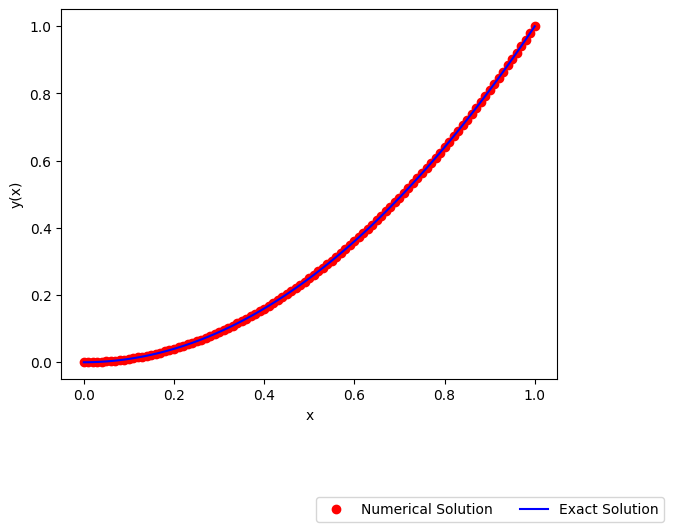

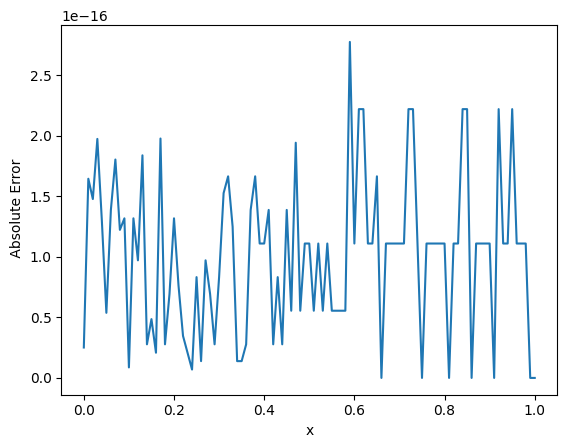

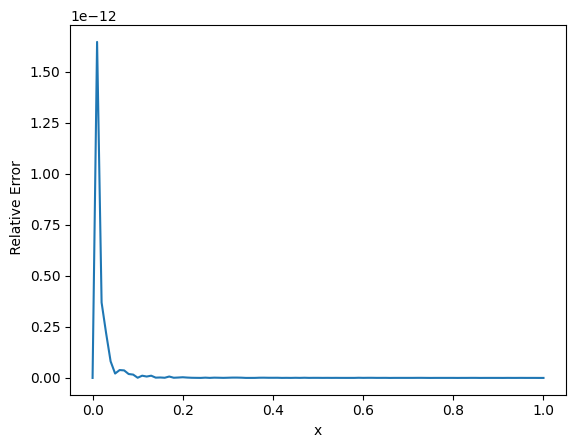

In [7]:
plt.plot(input_plot,NumSol, 'or',label="Numerical Solution")
plt.plot(input_plot, exacSol, '-b',label="Exact Solution")
plt.xlabel("x")
plt.ylabel("y(x)")
plt.legend(loc='upper left', bbox_to_anchor=(0.5, -0.3),ncol=5, fancybox=True)    
#plt.savefig('line_plot.pdf',bbox_inches='tight')
plt.show()

plt.plot(input_plot, error)
plt.xlabel("x")
plt.ylabel(" Absolute Error")
#plt.savefig('pic3.pdf',bbox_inches='tight')
plt.show()


plt.plot(input_plot, relative_error)
plt.xlabel("x")
plt.ylabel(" Relative Error")
plt.savefig('relative.png')
plt.show()


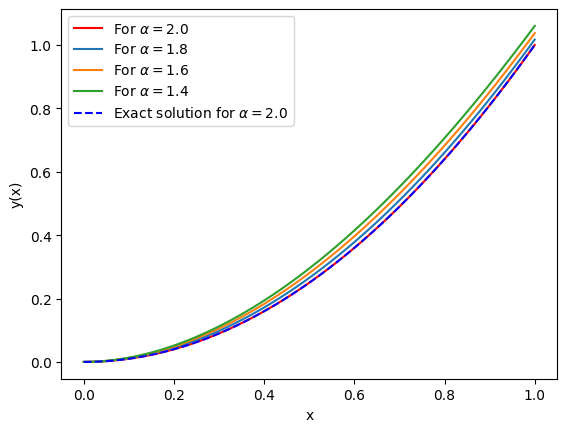

In [8]:
plt.plot(input_plot, solutions[0],color="red", label="For $\\alpha=2.0$")
plt.plot(input_plot, solutions[1], label="For $\\alpha=1.8$")
plt.plot(input_plot, solutions[2], label="For $\\alpha=1.6$")
plt.plot(input_plot, solutions[3], label="For $\\alpha=1.4$")
plt.plot(input_plot, Exsol(input_plot),linestyle="--", color="blue", label="Exact solution for $\\alpha=2.0$ ")
plt.xlabel("x")
plt.ylabel("y(x)")
plt.legend()    
plt.savefig('solution.png')
plt.show()




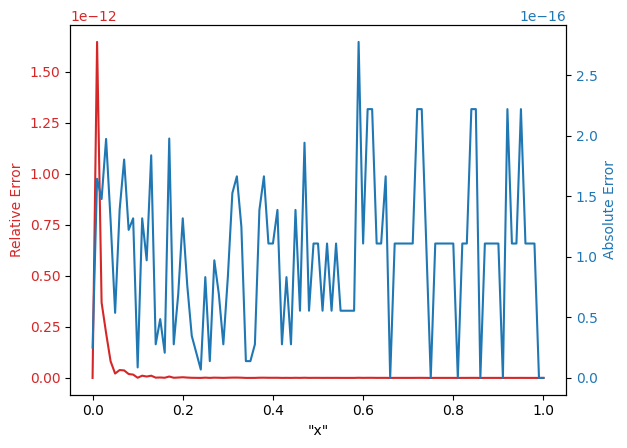

In [9]:
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('"x"')
ax1.set_ylabel('Relative Error', color=color, )
ax1.plot(input_plot, relative_error, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second Axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Absolute Error', color=color)  # we already handled the x-label with ax1
ax2.plot(input_plot, error, color=color)
ax2.tick_params(axis='y', labelcolor=color)
plt.savefig('error.png')
plt.show()